In [94]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [95]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [96]:
### Здесь требуется загрузить датасет phones.csv ###

In [97]:
phones = pd.read_csv('phones.csv')

In [98]:
phones.head(7)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015


In [99]:
os_num = {'Android': 1,'iOS': 2} 
phones['os_type'] = [os_num[item] for item in phones.os] 

In [118]:

phones.head(70)

,disk,os,price,year,os_type
0,64,Android,7256,2016,1
1,128,Android,7623,2015,1
2,64,Android,1916,2010,1
3,512,iOS,15045,2017,2
4,16,Android,4478,2013,1
5,512,iOS,15842,2018,2
6,128,Android,7191,2015,1
7,64,Android,4277,2013,1
8,512,iOS,12797,2015,2
9,64,Android,6256,2015,1


In [101]:
### Опицонально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

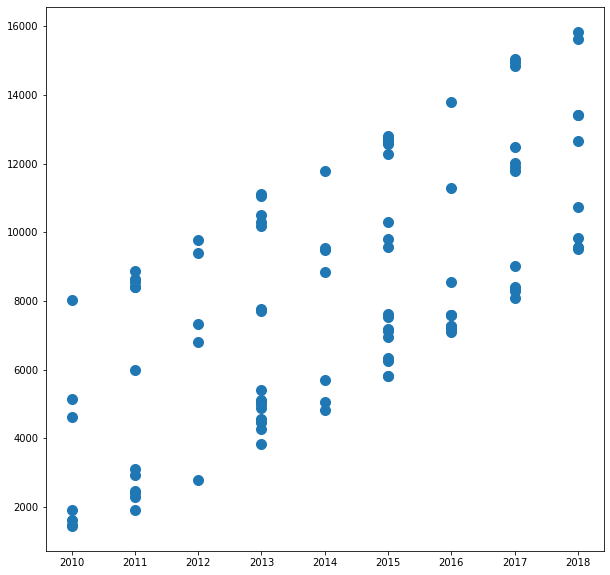

In [102]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.scatter(phones['year'], phones['price'], s=100)
plt.show()

Задание 1: обучить модель регрессии

In [103]:
from sklearn.linear_model import LinearRegression

### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['os_type', 'year', 'disk']] 
y = phones['price']

In [104]:
### Здесть следует запустить процесс обучения ###
### и продемонстрировать работосопосбность обученной модели ###

In [105]:
model = LinearRegression().fit(X,y)

In [106]:
a = model.intercept_
b = model.coef_

print(a)
print(b)

def predict(os, year, disk):
    return a + os*b[0] + year*b[1] + disk*b[2]

-2035771.5848918164
[1400.07501073 1012.58504634   10.38269781]


In [107]:
res = predict(phones.os_type[70], phones.year[70], phones.disk[70]), phones.price[70]
print(res)

res = predict(phones.os_type[10], phones.year[10], phones.disk[10]), phones.price[10]
print(res)

res = predict(phones.os_type[90], phones.year[90], phones.disk[90]), phones.price[90]
print(res)

res = predict(phones.os_type[2], phones.year[2], phones.disk[2]), phones.price[2]
print(res)

(11057.989197559109, 11305)
(13715.959838091934, 13788)
(13083.159290244956, 13422)
(1588.9259283689698, 1916)


Задание 2: обучить модель классификации

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text


### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['price', 'year', 'disk']] 
y = phones['os']

In [109]:
### Здесть следует запустить процесс обучения ###
### и продемонстрировать работосопосбность обученной модели ###

In [116]:
res = DecisionTreeClassifier().fit(X, y)

In [117]:
print(export_text(res))

|--- feature_2 <= 192.00
|   |--- class: Android
|--- feature_2 >  192.00
|   |--- class: iOS



In [124]:
print(res.predict(X[0:1])[0], y[0])
print(res.predict(X[40:41])[0], y[40])
print(res.predict(X[2:3])[0], y[2])

Android Android
iOS iOS
Android Android


Задание 3: обучить модель кластеризации

In [186]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'price']] 

<Figure size 720x720 with 0 Axes>

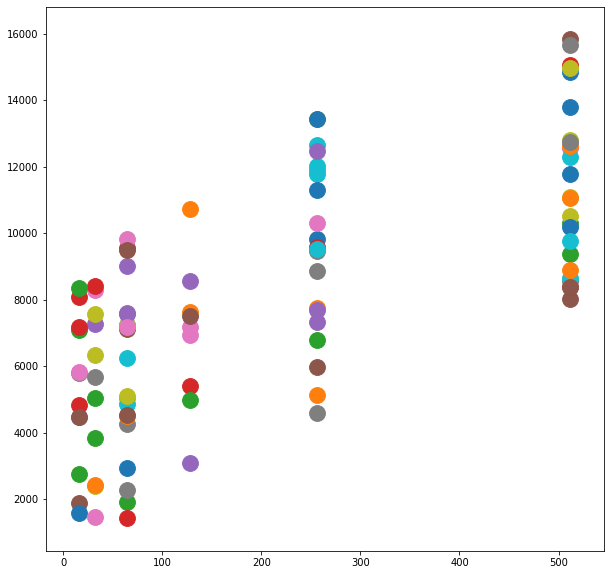

In [198]:
fig = plt.figure(figsize=(10, 10))
for p,d in zip(phones.disk, phones.price):
    plt.scatter(p,d,s = 250)

In [193]:
### Здесть следует запустить процесс обучения ###
### и продемонстрировать работосопосбность обученной модели ###
from sklearn.cluster import KMeans
clust = KMeans(n_clusters=3).fit(X)
res = clust.cluster_centers_
[c1, c2, c3] = res

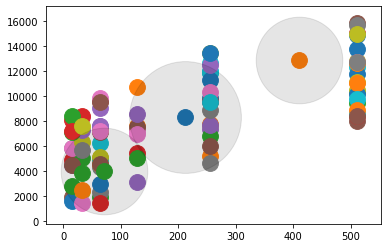

In [197]:
for p,d in zip(phones.disk, phones.price):
    plt.scatter(p,d,s = 250)
    
plt.scatter(c1[0], c1[1], s = 250)
plt.scatter(c1[0], c1[1], s = 250 * 5e1, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s = 250)
plt.scatter(c2[0], c2[1], s = 250 * 3e1, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s = 250)
plt.scatter(c3[0], c3[1], s = 250 * 3e1, c="black", alpha=0.1)